In [3]:
# add to the path as if we are in the regular src/ directory
import os
import sys
import pathlib
path_here = os.path.abspath(os.getcwd())
parent_path = pathlib.PurePath(path_here).parent
sys.path.append(str(parent_path))
print(f"Inserting {parent_path} into the path")

from datetime import datetime
from time import sleep
from random import random
import matplotlib.pyplot as plt
plt.ion()

from env.gym import GymHandler
from trainers.base_trainer import Trainer
from agents.policy_gradient import Agent_PPO, MLPActorCriticPG

Inserting /home_nfs/Luke/motion-predictor/src into the path


In [4]:
# get the hydra configurations
import hydra
from omegaconf import OmegaConf

# initialisation hydra and get the configuration
with hydra.initialize(config_path="../../configs", version_base=None):
  # get a specific configuration
  cfg = hydra.compose(config_name="config", overrides=[])
  print(OmegaConf.to_yaml(cfg))

wandb:
  project: motion-predictor
  job_type: train
  name: name-me ${now:%Y_%m_%d_%H_%M_%S}
  mode: online
device: cuda
seed: 123
model:
  name: ppo
  device: ${device}
  agent:
    _target_: agents.policy_gradient.Agent_PPO
    learning_rate_pi: 1.0e-05
    learning_rate_vf: 0.0001
    gamma: 0.99
    steps_per_epoch: 4000
    clip_ratio: 0.2
    train_pi_iters: 80
    train_vf_iters: 80
    lam: 0.97
    target_kl: 0.01
    max_kl_ratio: 1.5
    use_random_action_noise: true
    random_action_noise_size: 0.2
    optimiser: adam
    use_kl_penalty: false
    use_entropy_regularisation: false
    kl_penalty_coefficient: 0.2
    entropy_coefficient: 0.0001
    adam_beta1: 0.9
    adam_beta2: 0.999
    grad_clamp_value: null
    rngseed: 123
  network:
    _target_: agents.policy_gradient.MLPActorCriticPG
    obs_dim: ???
    act_dim: ???
    hidden_sizes:
    - 64
    - 64
    continous_actions: true
  trainer:
    _target_: trainers.base_trainer.Trainer
    num_episodes: 10000
    te

In [5]:
# create the environment from configuation settings
env = hydra.utils.instantiate(cfg.env)

# define the input and output sizes for the network
cfg.model.network.obs_dim = env.obs_dim
cfg.model.network.act_dim = env.act_dim

# create the network from configuration settings
network = hydra.utils.instantiate(cfg.model.network)

# create the agent from configuration settings
agent = hydra.utils.instantiate(cfg.model.agent)
agent.init(network)

# create the trainer from configuration settings
logger = hydra.utils.instantiate(cfg.logger)
trainer = hydra.utils.instantiate(cfg.trainer, agent=agent, env=env, logger=logger)

Trainer settings:
 -> Run name: run_15-52
 -> Group name: 2025-02-12
 -> Given seed: 123
 -> Training reproducible: False
 -> Using device: cpu
 -> Save enabled: True
 -> Save path: models/2025-02-12/


Saving file models/2025-02-12/run_15-52/Trainer_params_001.lz4 with pickle ... finished
Saving file models/2025-02-12/run_15-52/Tracking_info.lz4 with pickle ... finished
Saving file models/2025-02-12/run_15-52/Agent_PPO_001.lz4 with pickle ... finished
Trainer hyperparameters:

{'num_episodes': 100000
 'test_freq': 200
 'save_freq': 200
 'use_curriculum': False
 'rngseed': 123
 'training_reproducible': False
 'saving_enabled': True}

Agent hyperparameters:

{'learning_rate_pi': 1e-05
 'learning_rate_vf': 0.0001
 'gamma': 0.99
 'steps_per_epoch': 4000
 'clip_ratio': 0.2
 'train_pi_iters': 80
 'train_vf_iters': 80
 'lam': 0.97
 'target_kl': 0.01
 'max_kl_ratio': 1.5
 'use_random_action_noise': True
 'random_action_noise_size': 0.2
 'optimiser': 'adam'
 'use_kl_penalty': False
 'use_entropy_regularisation': False
 'kl_penalty_coefficient': 0.2
 'entropy_coefficient': 0.0001
 'adam_beta1': 0.9
 'adam_beta2': 0.999
 'grad_clamp_value': None
 'network_name': 'MLPActorCriticPG_64x64'}

Env h

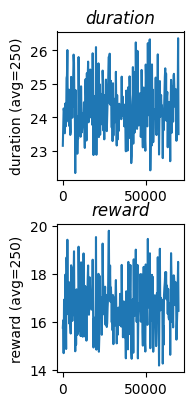

Episode 250 training metrics:
 -> duration = 18.000
 -> reward = 15.862

Begin training episode 251
Episode 500 training metrics:
 -> duration = 19.000
 -> reward = 11.116

Begin training episode 501
Episode 750 training metrics:
 -> duration = 27.000
 -> reward = 20.713

Begin training episode 751
Episode 1000 training metrics:
 -> duration = 23.000
 -> reward = 17.405

Begin training episode 1001
Episode 1250 training metrics:
 -> duration = 19.000
 -> reward = 8.740

Begin training episode 1251
Episode 1500 training metrics:
 -> duration = 21.000
 -> reward = 5.726

Begin training episode 1501
Episode 1750 training metrics:
 -> duration = 29.000
 -> reward = 22.465

Begin training episode 1751
Episode 2000 training metrics:
 -> duration = 12.000
 -> reward = 6.199

Begin training episode 2001
Episode 2250 training metrics:
 -> duration = 30.000
 -> reward = 8.431

Begin training episode 2251
Episode 2500 training metrics:
 -> duration = 27.000
 -> reward = 15.130

Begin training epi

Traceback (most recent call last):
  File "/home_nfs/Luke/pyenv/py310_mjx/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_2557010/1213932961.py", line 4, in <module>
    trainer.train()
  File "/home_nfs/Luke/motion-predictor/src/trainers/base_trainer.py", line 762, in train
    if self.plot: self.track.plot()
  File "/home_nfs/Luke/motion-predictor/src/trainers/base_trainer.py", line 684, in run_episode
  File "/home_nfs/Luke/motion-predictor/src/agents/policy_gradient.py", line 1000, in update_step
    self.buffer.finish_trajectory(end_value)
  File "/home_nfs/Luke/motion-predictor/src/agents/policy_gradient.py", line 128, in finish_trajectory
    self.advantages[trajectory_slice] = discount_cumsum(deltas, self.gamma * self.lam, self.device)
  File "/home_nfs/Luke/motion-predictor/src/agents/policy_gradient.py", line 43, in discount_cumsum
    return lfilter(waveform, a

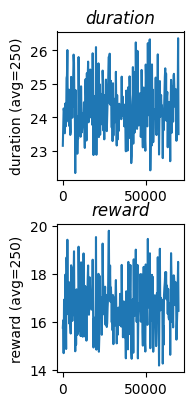

In [6]:
trainer.plot = True
trainer.params.num_episodes = 100_000

trainer.train()

In [ ]:
agent = Agent_PPO(device="cpu", **cfg.model.algo)
agent.init(network)

ConfigAttributeError: Key 'algo' is not in struct
    full_key: model.algo
    object_type=dict

In [ ]:
print(cfg.model.device)

cuda


Trainer settings:
 -> Run name: run_11-19
 -> Group name: 2025-02-12
 -> Given seed: None
 -> Training reproducible: False
 -> Using device: cpu
 -> Save enabled: True
 -> Save path: models/2025-02-12/
Saving file models/2025-02-12/run_11-19/Trainer_params_001.lz4 with pickle ... finished
Saving file models/2025-02-12/run_11-19/Tracking_info.lz4 with pickle ... finished
Saving file models/2025-02-12/run_11-19/Agent_PPO_001.lz4 with pickle ... finished
Trainer hyperparameters:

{'num_episodes': 1000
 'test_freq': 100
 'save_freq': 100
 'use_curriculum': False
 'rngseed': 1698134562
 'training_reproducible': False
 'saving_enabled': True}

Agent hyperparameters:

{'learning_rate_pi': 1e-05
 'learning_rate_vf': 0.0001
 'gamma': 0.99
 'steps_per_epoch': 4000
 'clip_ratio': 0.2
 'train_pi_iters': 80
 'train_vf_iters': 80
 'lam': 0.97
 'target_kl': 0.01
 'max_kl_ratio': 1.5
 'use_random_action_noise': True
 'random_action_noise_size': 0.2
 'optimiser': 'adam'
 'use_kl_penalty': False
 'use_e

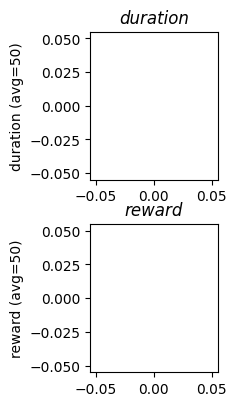

(2, 1)


Error: You must call wandb.init() before wandb.log()

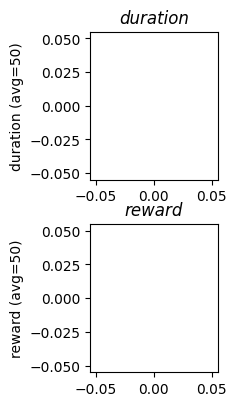

In [ ]:
# create the trainer
trainer = Trainer(agent, env, num_episodes=1000, test_freq=100, save_freq=100,
                  rngseed=None, log_level=1, device="cpu", render=False, plot=True,
                  use_curriculum=False, episode_log_rate=50)

trainer.train()

In [ ]:
device = "cpu"
log_level = 1
rngseed = None
render = False

# make the environment
env = GymHandler("Walker2d-v5")

# make the network for the agent
layers = [128 for i in range(2)]
network = MLPActorCriticPG(env.obs_dim, env.act_dim, hidden_sizes=layers,
                            continous_actions=True)

# make the agent
agent = Agent_PPO(device="cpu", **cfg.model.algo)
agent.init(network)

# create the trainer
trainer = Trainer(agent, env, rngseed=rngseed, log_level=log_level,
                  device=device, render=render, plot=True,
                  episode_log_rate=50)

TypeError: Agent_PPO.__init__() missing 20 required positional arguments: 'learning_rate_pi', 'learning_rate_vf', 'gamma', 'steps_per_epoch', 'clip_ratio', 'train_pi_iters', 'train_vf_iters', 'lam', 'target_kl', 'max_kl_ratio', 'use_random_action_noise', 'random_action_noise_size', 'optimiser', 'use_kl_penalty', 'use_entropy_regularisation', 'kl_penalty_coefficient', 'entropy_coefficient', 'adam_beta1', 'adam_beta2', and 'grad_clamp_value'

Saving file models/2025-02-11/run_16-40/Trainer_params_001.lz4 with pickle ... finished
Saving file models/2025-02-11/run_16-40/Tracking_info.lz4 with pickle ... finished
Saving file models/2025-02-11/run_16-40/Agent_PPO_001.lz4 with pickle ... finished
Trainer hyperparameters:

{'num_episodes': 1000
 'test_freq': 200
 'save_freq': 200
 'use_curriculum': False
 'rngseed': 487864237
 'training_reproducible': False
 'saving_enabled': True}

Agent hyperparameters:

{'learning_rate_pi': 1e-05
 'learning_rate_vf': 1e-05
 'gamma': 0.99
 'steps_per_epoch': 4000
 'clip_ratio': 0.2
 'train_pi_iters': 10
 'train_vf_iters': 10
 'lam': 0.97
 'target_kl': 0.01
 'max_kl_ratio': 1.5
 'use_random_action_noise': True
 'random_action_noise_size': 0.1
 'optimiser': 'adam'
 'use_kl_penalty': False
 'use_entropy_regularisation': False
 'kl_penalty_coefficient': 0.2
 'entropy_coefficient': 0.0001
 'adam_beta1': 0.9
 'adam_beta2': 0.999
 'grad_clamp_value': None
 'network_name': 'MLPActorCriticPG_128x128'}



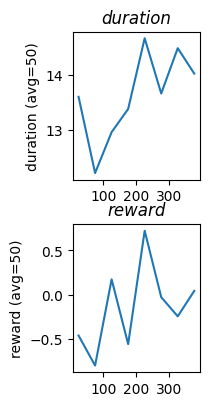

(2, 1)
Episode 50 training metrics:
 -> duration = 12.000
 -> reward = -1.215

Begin training episode 51
Episode 100 training metrics:
 -> duration = 13.000
 -> reward = 2.332

Begin training episode 101
Episode 150 training metrics:
 -> duration = 12.000
 -> reward = 1.255

Begin training episode 151
Episode 200 training metrics:
 -> duration = 16.000
 -> reward = 1.629

Begin training episode 201
Episode 250 training metrics:
 -> duration = 15.000
 -> reward = 0.359

Begin training episode 251
Episode 300 training metrics:
 -> duration = 7.000
 -> reward = -3.104

Begin training episode 301
Episode 350 training metrics:
 -> duration = 14.000
 -> reward = 1.844

Begin training episode 351
Episode 400 training metrics:
 -> duration = 29.000
 -> reward = 10.041

Begin training episode 401
Episode 450 training metrics:
 -> duration = 19.000
 -> reward = 1.385

Begin training episode 451


KeyboardInterrupt: 

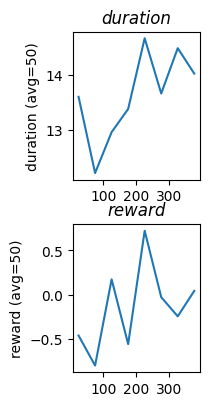

In [ ]:
# run the training
trainer.train()